# Bike Sharing Demand Prediction

This notebook covers data preprocessing, feature engineering, and model training for predicting bike-sharing demand.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("day.csv")  # Replace with actual dataset path

# Display basic info and first few rows
print(df.info())
print(df.head())

# Data Preprocessing: Handling missing values
df = df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  20

In [4]:
df = df.rename(columns={'yr':'year',
                        'mnth':'month',
                        'hum':'humidity',
                        'weathersit':'weather',
                        'cnt':'count',
                        'hr':'hour',
                        'dteday':'day date',
                        'temp':'tempreature'})
df.columns

Index(['instant', 'day date', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weather', 'tempreature', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [7]:
# Feature Engineering: Selecting relevant features
df['hour'] = pd.to_datetime(df['day date']).dt.hour
df['day_of_week'] = pd.to_datetime(df['day date']).dt.dayofweek

features = ['hour', 'day_of_week', 'tempreature', 'humidity', 'windspeed']
target = 'count'

X = df[features]
y = df[target]

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)


Mean Absolute Error: 1155.194965986395
Mean Squared Error: 1976255.682219048
R-squared Score: 0.5071536918064534


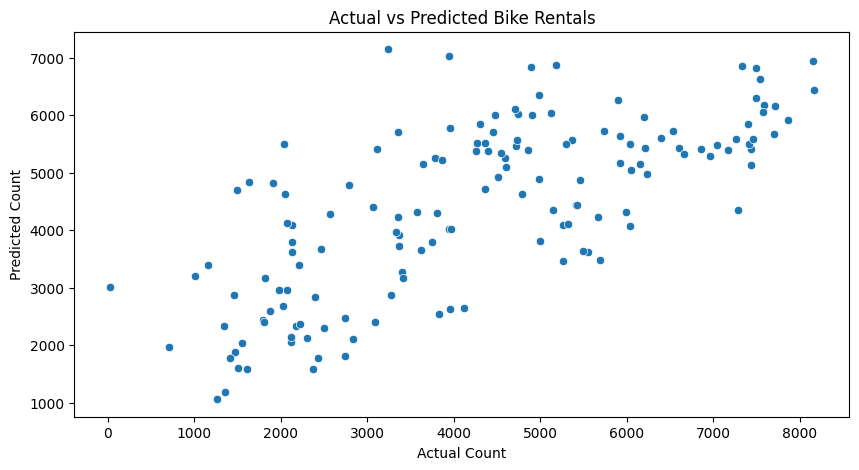

In [8]:

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Visualization
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Count")
plt.ylabel("Predicted Count")
plt.title("Actual vs Predicted Bike Rentals")
plt.show()
